# Titanic Dataset - Exploratory Data Analysis (EDA)

 step-by-step analysis of the Titanic dataset using Python.

# Step 1: Load the Dataset

In [ ]:
#  Upload Titanic Dataset (train.csv)
from google.colab import files

# Upload file from your computer
uploaded = files.upload()

# Load into DataFrame
import pandas as pd
df = pd.read_csv("train.csv")

# Display first few rows
df.head()


Saving train.csv to train.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step 2: Clean the Data

In [ ]:
# Check missing values
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


# Age Distribution

Understanding passenger age is important for analyzing Titanic survival patterns.

This plot will show us how age was distributed across the passengers. Most passengers were between 20 and 40 years old. This helps us later compare...

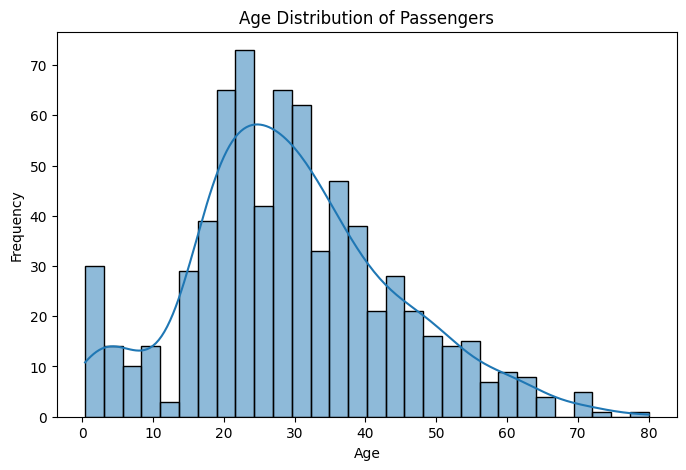

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Fill missing age with median
df['age'] = df['age'].fillna(df['age'].median())

# Fill 'embarked' with mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop 'deck' if it exists
if 'deck' in df.columns:
    df = df.drop(columns=['deck'])

# Drop rows where embark_town is missing
df = df.dropna(subset=['embark_town'])

# Confirm no missing values
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


# Step 3: Convert Data Types

In [ ]:
df['sex'] = df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')
df['class'] = df['class'].astype('category')

# Check data types
df.dtypes

,0
survived,int64
pclass,int64
sex,category
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,category
class,category
who,object


# Step 4: Summary Statistics

In [ ]:
# Summary of all columns
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
count,889.000000,889.000000,889,889.000000,889.000000,889.000000,889.000000,889,889,889,889,889,889,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,644,549,535
mean,0.382452,2.311586,NaN,29.315152,0.524184,0.382452,32.096681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486260,0.834700,NaN,12.984932,1.103705,0.806761,49.697504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.895800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 5: Group-Based Insights

In [ ]:
# Survival rate by gender
df.groupby('sex')['survived'].mean()

/tmp/ipython-input-3987934686.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['survived'].mean()


,survived
sex,
female,0.740385
male,0.188908


In [ ]:
# Survival rate by class
df.groupby('class')['survived'].mean()

/tmp/ipython-input-466890979.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('class')['survived'].mean()


,survived
class,
First,0.626168
Second,0.472826
Third,0.242363


In [ ]:
# Survival rate by class and gender
df.pivot_table(index='class', columns='sex', values='survived')

/tmp/ipython-input-2294050335.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='class', columns='sex', values='survived')


sex,female,male
class,,
First,0.967391,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


## 📉 Step 6: Visualizations

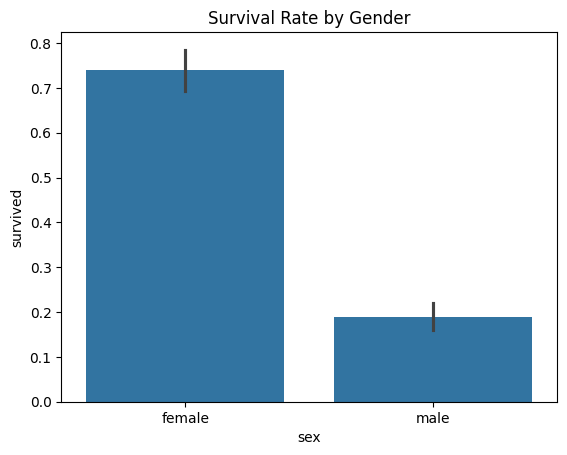

In [ ]:
# Bar plot: Survival by Gender
sns.barplot(x='sex', y='survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()

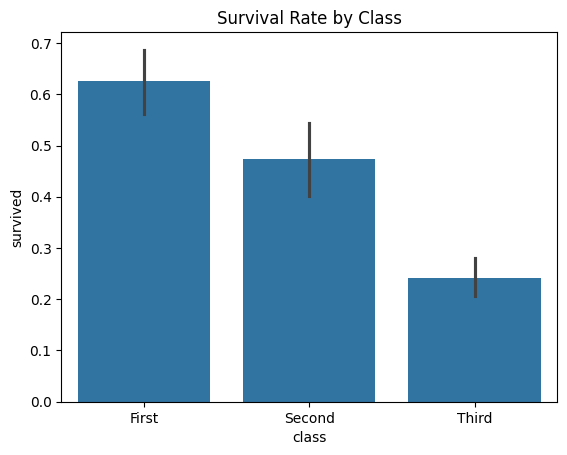

In [ ]:
# Bar plot: Survival by Class
sns.barplot(x='class', y='survived', data=df)
plt.title("Survival Rate by Class")
plt.show()

/tmp/ipython-input-665266806.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='class', columns='sex', values='survived')


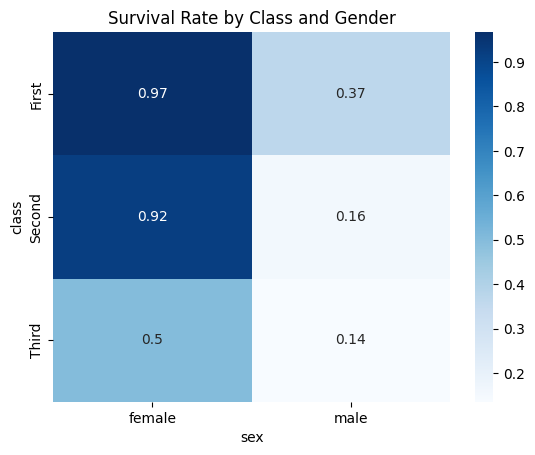

In [ ]:
# Heatmap: Survival by Class & Gender
pivot = df.pivot_table(index='class', columns='sex', values='survived')
sns.heatmap(pivot, annot=True, cmap='Blues')
plt.title("Survival Rate by Class and Gender")
plt.show()

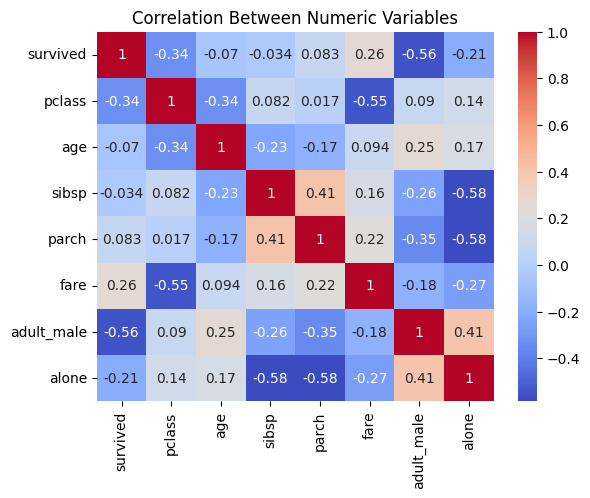

In [ ]:
# Correlation Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Variables")
plt.show()